In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import pandas as pd
import numpy as np
from src.config import *
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
additional_mapping = {
       'IFNA':'IFNA1', 
       'IFNB':'IFNB1',
       'IFNL':'IFNL1', 
       'TNFA':'TNF', 
       'IL12':'IL12B', 
       'CD40L':'CD40LG', 
       'GMCSF':'CSF2', 
       'MCSF':'CSF1',
       'IL1':'IL1A', 
       'TWEAK':'TNFRSF12A',
       'TRAIL':'TNFSF10',
       'GCSF':'CSF3',
       'IL32':'IL32',
       'OPGL':'TNFSF11',
       'BAFF':'TNFSF13B',
       '41BBL':'TNFSF9',
       'IL23':'IL23A', 
       'CXCL4':'PF4',
       'Activin A':'INHBA',
       'ANGPTL4':'ANGPTL4',
       'ANGPTL2':'ANGPTL2',
       'PGE2':'PTGES2',
       'NO':'NO',
       'PDL1':'CD274'
}
inverse_additional_mapping = {v: k for k, v in additional_mapping.items()}

In [41]:
# confidence_scores = pd.read_csv(f'results/confidence/receptor_rocauc_mean_confidence_scores_229_mwup_withna.csv', index_col = 0)

In [42]:
# lincs_model = pd.read_csv(f'data/coefficient_matrix/high_quality/all_pert_coef_liana.csv', index_col =0)
# lincs_model = lincs_model.T

In [43]:
lincs ={}
lincs['all'] = pd.read_csv('results/temp/lincs_cytosig_prediction_filteredsignatures.csv', index_col = 0)

In [44]:
lincs_translate_to_ligs = pd.read_csv('results/benchmark/lincs_translate_to_ligands_v2.csv', index_col = 0)

In [45]:
lincs_translate_to_ligs.head()

,perturbation,perturbation_type,signed_interactions_rec,signed_interactions_lig,modality
4-chlorophenylguanidine_A375_cp,4-chlorophenylguanidine,cp,{'PLAUR': -1},"{'PLAU': -1, 'MMP12': -1}",cp
4-chlorophenylguanidine_PC3_cp,4-chlorophenylguanidine,cp,{'PLAUR': -1},"{'PLAU': -1, 'MMP12': -1}",cp
4-chlorophenylguanidine_U2OS_cp,4-chlorophenylguanidine,cp,{'PLAUR': -1},"{'PLAU': -1, 'MMP12': -1}",cp
ABT-239_A375_cp,ABT-239,cp,{'HRH3': -1},{'HDC': -1},cp
ABT-239_A549_cp,ABT-239,cp,{'HRH3': -1},{'HDC': -1},cp


In [46]:
cytokine_signalling_activity = pd.read_csv('results/benchmark/cytosig_prediction_inferred_signature2.Coef.Coef', index_col = 0, sep = '\t' )
cytokine_signalling_activity = cytokine_signalling_activity.T

In [47]:
cytokine_signalling_activity.shape

(38989, 43)

In [48]:
# Filter for 
cytokine_signalling_activity = cytokine_signalling_activity.loc[lincs_translate_to_ligs.index]
cytokine_signalling_activity.shape

(14463, 43)

In [49]:
mapped_columns = cytokine_signalling_activity.columns.map(lambda x: additional_mapping.get(x, x))
cytokine_signalling_activity.columns = mapped_columns

In [50]:
signed_interactions = lincs_translate_to_ligs['signed_interactions_lig'].apply(eval).apply(pd.Series)

metadata = pd.DataFrame(index=lincs_translate_to_ligs.index)
metadata = metadata.merge(signed_interactions, left_index=True, right_index=True, how='left').fillna(0)

In [51]:
# ligand perturabtions with direction
metadata.head()


,PLAU,MMP12,HDC,F2,PLG,TPSAB1,IGF1,IGF2,INS,PDGFB,...,LAMC2,WNT4,WNT10A,IL26,IFNL1,IFNL2,IFNL3,UTS2B,TSLP,CCL4
4-chlorophenylguanidine_A375_cp,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4-chlorophenylguanidine_PC3_cp,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4-chlorophenylguanidine_U2OS_cp,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABT-239_A375_cp,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABT-239_A549_cp,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# filter for cytokines that is involved in LINCS perturbation signatyres
common_cytokines = sorted(list(set(cytokine_signalling_activity) & set(metadata.columns)))

In [53]:
metadata = metadata[common_cytokines]
metadata = metadata[metadata.abs().sum(1)!=0]
cytokine_signalling_activity = cytokine_signalling_activity.loc[metadata.index, common_cytokines]

In [86]:
metadata.head()

,BDNF,BMP2,BMP4,BMP6,CD40LG,CSF1,CXCL12,EGF,FGF2,GDF11,...,INHBA,LIF,LTA,OSM,TGFB1,TGFB3,TNF,TNFSF10,VEGFA,WNT3A
AG-494_A375_cp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0
AG-494_A549_cp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0
AG-494_ASC_cp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0
AG-494_HA1E_cp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0
AG-494_HCC515_cp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0


In [87]:
cytokine_signalling_activity.head()

,BDNF,BMP2,BMP4,BMP6,CD40LG,CSF1,CXCL12,EGF,FGF2,GDF11,...,INHBA,LIF,LTA,OSM,TGFB1,TGFB3,TNF,TNFSF10,VEGFA,WNT3A
AG-494_A375_cp,-0.009974,0.002074,-0.004815,-0.004172,0.011416,0.013282,-0.005698,0.001449,-0.002290,0.009250,...,-0.013802,0.010231,-0.000400,-0.011729,0.025583,0.026785,0.019099,0.007787,-0.004489,0.007100
AG-494_A549_cp,0.006022,0.012574,0.019428,0.001706,0.000959,-0.008298,-0.004381,0.032548,-0.001520,0.001053,...,0.013801,-0.000348,0.012965,-0.000280,-0.004569,-0.005591,0.003700,-0.005199,0.033748,-0.004407
AG-494_ASC_cp,0.015304,0.020582,-0.004553,-0.002407,-0.000372,-0.018696,-0.001029,0.045621,0.017523,0.004600,...,-0.003412,0.000318,-0.006603,-0.009061,0.001688,0.000115,-0.016326,0.010979,0.036146,0.005160
AG-494_HA1E_cp,0.003982,0.014704,0.034515,-0.011988,0.005394,0.015423,0.007617,-0.001108,0.031132,0.005684,...,0.001221,-0.000019,-0.004414,0.008636,-0.002498,0.029745,-0.003424,-0.013582,0.011242,0.000337
AG-494_HCC515_cp,-0.011005,-0.003499,0.015455,0.000156,0.003944,0.016069,0.013565,-0.027129,-0.002573,0.001826,...,0.005191,-0.000503,0.008368,0.005736,0.003256,0.006263,0.005002,-0.000441,-0.003622,-0.000153


In [54]:
def create_negativ_and_positive_binary(metadata):
    """
    Splits a given metadata DataFrame into two binary DataFrames:
    one representing negative perturbations and the other representing positive perturbations.

    1. Negative binary matrix:
        - Replaces all `1`s with `0`s.
        - Ensures the resulting DataFrame contains only `-1` and `0`.
        - Drops columns that contain only zeros.
        - Converts `-1`s to `1`s to create a binary representation.
    2. Positive binary matrix:
        - Replaces all `-1`s with `0`s.
        - Ensures the resulting DataFrame contains only `0` and `1`.
        - Drops columns that contain only zeros.
    """
    binary = metadata.copy()
    if (binary == -1).any().any() == False:
        print('There are only positive perturbations, no negative matrix')
        negative_binary = pd.DataFrame()
    else:
        negative_binary = binary.replace({1:0})
        assert set(np.unique(negative_binary.values)) == {-1, 0}
        # delete only 0 rows
        s = negative_binary.sum() != 0
        negative_binary = negative_binary.loc[:, s.values]
        # change sign
        negative_binary = negative_binary.replace({-1:1})
        assert set(np.unique(negative_binary.values)) == {0, 1}

    if (binary == 1).any().any() == False:
        print('There are only negative perturbations, no positive matrix')
        positive_binary = pd.DataFrame()
    else: 
        positive_binary = binary.replace({-1:0})
        assert set(np.unique(positive_binary.values)) == {0, 1}
        # delete only 0 rows
        s = positive_binary.sum() != 0
        positive_binary = positive_binary.loc[:, s.values]

    return negative_binary, positive_binary

In [ ]:
# metadata contains perturabtion signatures which perturbs at least 1 of the overlapping cytokines with CytoSig
metadata.abs().sum(1).sort_values()

In [55]:
negative, positive = create_negativ_and_positive_binary(metadata)

In [62]:
def calculate_class_imbalance(metadata):
    class_imbalance_dict = {} 
    for column in metadata.columns:
        true_vector = metadata[column]   
        positive_count = true_vector.sum()  # Count of 1s (positives)
        negative_count = len(true_vector) - positive_count  # Count of 0s (negatives)
        class_imbalance = positive_count / (negative_count + 1e-5)
        class_imbalance_dict[column] = class_imbalance
    
    class_imbalance_results = pd.DataFrame.from_dict(class_imbalance_dict, orient='index', columns=['Class Imbalance'])
    
    return class_imbalance_results


In [63]:
negative_class_imbalance = calculate_class_imbalance(negative)
negative_class_imbalance['Model'] = 'CytoSig'
negative_class_imbalance['Perturbation_effect'] = 'negative'
positive_class_imbalance = calculate_class_imbalance(positive)
positive_class_imbalance['Model'] = 'CytoSig'
positive_class_imbalance['Perturbation_effect'] = 'positive'
# ridden_positive_class_imbalance = class_imbalance_results['all'].copy()
# ridden_positive_class_imbalance['Model'] = 'RIDDEN'
# ridden_positive_class_imbalance['Perturbation_effect'] = 'positive'

In [67]:
imbalances = pd.concat([positive_class_imbalance, negative_class_imbalance])
imbalances['Label'] = imbalances['Model'] + '\nperturbation_effect:\n' + imbalances['Perturbation_effect']

In [95]:
imbalances.sort_values(by = 'Class Imbalance').tail(5)
# VEGFA, TGFB1 and EGF have high value

,Class Imbalance,Model,Perturbation_effect,Label
HGF,0.134196,CytoSig,negative,CytoSig\nperturbation_effect:\nnegative
FGF2,0.170563,CytoSig,negative,CytoSig\nperturbation_effect:\nnegative
EGF,0.392214,CytoSig,negative,CytoSig\nperturbation_effect:\nnegative
TGFB1,0.410518,CytoSig,negative,CytoSig\nperturbation_effect:\nnegative
VEGFA,0.794198,CytoSig,negative,CytoSig\nperturbation_effect:\nnegative


([0, 1],
 [Text(0, 0, 'CytoSig\nperturbation_effect:\npositive'),
  Text(1, 0, 'CytoSig\nperturbation_effect:\nnegative')])

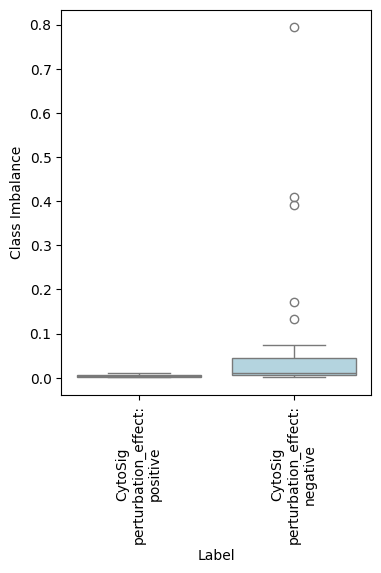

In [68]:
fig, ax = plt.subplots(figsize = (4,5))
sns.boxplot(data =imbalances, x = 'Label', y = 'Class Imbalance', color = 'lightblue')
plt.xticks(rotation = 90)

In [135]:
metadata_selected = negative
column = 'VEGFA'
class_imbalance_dict = {}
true_vector = metadata_selected[column]   
positive_count = true_vector.sum()  # Count of 1s (positives)
negative_count = len(true_vector) - positive_count  # Count of 0s (negatives)
class_imbalance = positive_count / (negative_count) # added small value for avoiding dividing by 0
    

In [145]:
negative_count, positive_count

(np.float64(2930.0), np.float64(2327.0))

In [137]:
lr_associations[lr_associations['source_genesymbol'] == 'VEGFA']

,source_genesymbol,target_genesymbol
382,VEGFA,FLT1
406,VEGFA,KDR
739,VEGFA,NRP1
740,VEGFA,NRP2
1332,VEGFA,EGFR


In [138]:
perturbations_targeting_vegfa = true_vector[true_vector == 1].index.str.split('_').str[0].unique()
sorted(list(perturbations_targeting_vegfa))

['AG-494',
 'AG-957',
 'ARRY-334543',
 'AST-1306',
 'AV-412',
 'BIBU-1361',
 'BIBX-1382',
 'BMS-599626',
 'CGP-52411',
 'CGP-53353',
 'EGFR',
 'ENMD-2076',
 'FLT1',
 'GW-583340',
 'HMN-214',
 'KDR',
 'LFM-A12',
 'MK-2461',
 'NRP1',
 'ON-01910',
 'OSI-930',
 'PD-158780',
 'RG-14620',
 'SU-11652',
 'VEGFA',
 'WHI-P154',
 'WZ-3146',
 'WZ-4002',
 'afatinib',
 'alvocidib',
 'angiogenesis-inhibitor',
 'bis-tyrphostin',
 'cabozantinib',
 'canertinib',
 'cediranib',
 'chrysophanic-acid',
 'dacomitinib',
 'dovitinib',
 'erbstatin-analog',
 'erlotinib',
 'foretinib',
 'gefitinib',
 'golvatinib',
 'lapatinib',
 'lavendustin-c',
 'lenvatinib',
 'linifanib',
 'lucitanib',
 'malonoben',
 'motesanib',
 'neratinib',
 'nintedanib',
 'orantinib',
 'pazopanib',
 'pelitinib',
 'rebastinib',
 'regorafenib',
 'rociletinib',
 'semaxanib',
 'sorafenib',
 'sunitinib',
 'tivozanib',
 'tyrphostin-47',
 'vandetanib',
 'vatalanib']

In [139]:
compound_info = pd.read_csv('data/filtered_lincs_meta/filtered_coumpound_info_to_receptor_perturbation_signatures_signed.csv', index_col =0)
compound_info = compound_info[['cmap_name', 'target', 'sign']].reset_index(drop=True)

In [143]:
drugstargetingvegfa = set(sorted(compound_info[compound_info['target'].isin(['VEGFA', 'FLT1', 'KDR', 'EGFR', 'NRP1'])].cmap_name.unique()))
perts_targeting_vegfa = set(perturbations_targeting_vegfa)
perts_targeting_vegfa - drugstargetingvegfa

{'EGFR', 'FLT1', 'KDR', 'NRP1', 'VEGFA'}

In [134]:
positive_count/negative_count, positive_count, negative_count

(np.float64(0.79419795221843), np.float64(2327.0), np.float64(2930.0))